# MIS780 Advanced AI For Business - Assignment 2 - T2 2022

## Example 1:  Multilayer Perceptron - Diabetes Classification Problem

**Student Name:** Pranitha Gaddam

**Student ID:** 221183244

## Table of Content
   
1. [Data Description](#cell_Preparation)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Model Construction](#cell_model)

4. [Model Execution](#cell_execution)
 
5. [Experiments Report](#cell_report)



## Executive Summary

The objective of conducting a neural network model analysis on the dataset is to diagnostically predict whether or not a patient has diabetes. The dataset "Pima Indians Diabetes Database" has been acquired from Kaggle. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.The proposed model applied in this instance is Multilayer Perceptron using Keras package. MLP's are feedforward NN which help in classification of dataset, be it binary or multiple classes. MLPs are useful in their research for solving problems stochastically which often allows approximate solutions for extremely complex problems. Moreover, in order to improve the accuracy score, we can interchange the number of neurons in the layers which produces a classification score. The perceptron learns a decision boundary on a graph that separates two classes using a line (called a hyperplane) in the feature space, and thus produces an output. 

We conduct analysis by first cleaning the dataset and dropping any null values. Followed by, standardisation of the dataset and splitting the dataset into Test and Train set. We then construct the MLP model and execute it by fitting the training set to see if it overfits with the test set. We then perform prediction on the test dataset to get the accuracy score determining whether the model has performed well or not, implying how well can the model predict whether a patient has diabetes or not. 

<a id = "cell_Preparation"></a>
## 1. Data Description

The dataset has 8 medical predictor (independent) variables namely : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age and one target variable 'Outcome' that will help determine whether a person has diabetes. The dataset has the shape of 768 rows and 9 columns. 

In [ ]:
#mount drive to import the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import the necessary packages
import numpy as np 
from keras.models import Sequential 
from keras.layers import LSTM 
from keras.layers import Dense, Dropout 
import pandas as pd
from matplotlib import pyplot as plt 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
D = pd.read_csv('/content/drive/MyDrive/MIS780/diabetes.csv')

In [ ]:
D.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
D.shape

(768, 9)

In [ ]:
#Checking for duplicates and removing any
D.drop_duplicates(inplace = True)

In [ ]:
D.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
#Convert the dataset into an array 
Diabetes = D.values
Diabetes

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
#Get all of the rows from the first eight columns of the dataset 
X = Diabetes[:, 0:8]
y = Diabetes[:,8]

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
#Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scale, y , test_size =0.2, random_state = 4)

<a id = "cell_model"></a>
## 3. Model Construction

The model used here is Sequential which consists of three Dense layers. The first Dense layer has three attributes :  15 layers, ReLu activation function and input shape of (8,). The second Dense layer has 15 layers and the last layer has 1 layer. I have used sigmoid activation function since it is a binary classification. 

In [ ]:
model = Sequential([
    Dense(20, activation = 'relu', input_shape = (8,)),
    Dense(15, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'binary_crossentropy',
              metrics= ['accuracy'])

<a id = "cell_execution"></a>
## 4. Model Execution

In [ ]:
hist = model.fit(X_train, y_train, batch_size = 50, epochs = 800, validation_split = 0.2)

Epoch 1/800
10/10 [==============================] - 0s 17ms/step - loss: 0.7058 - accuracy: 0.3523 - val_loss: 0.7020 - val_accuracy: 0.3577
Epoch 2/800
10/10 [==============================] - 0s 5ms/step - loss: 0.6982 - accuracy: 0.3605 - val_loss: 0.6950 - val_accuracy: 0.3740
Epoch 3/800
10/10 [==============================] - 0s 5ms/step - loss: 0.6918 - accuracy: 0.5275 - val_loss: 0.6890 - val_accuracy: 0.6341
Epoch 4/800
10/10 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.6517 - val_loss: 0.6838 - val_accuracy: 0.6423
Epoch 5/800
10/10 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.6721 - val_loss: 0.6792 - val_accuracy: 0.6911
Epoch 6/800
10/10 [==============================] - 0s 5ms/step - loss: 0.6774 - accuracy: 0.6538 - val_loss: 0.6753 - val_accuracy: 0.6504
Epoch 7/800
10/10 [==============================] - 0s 6ms/step - loss: 0.6738 - accuracy: 0.6619 - val_loss: 0.6718 - val_accuracy: 0.6667
Epoch 8/800


<a id = "cell_report"></a>
## 5. Experiments Report

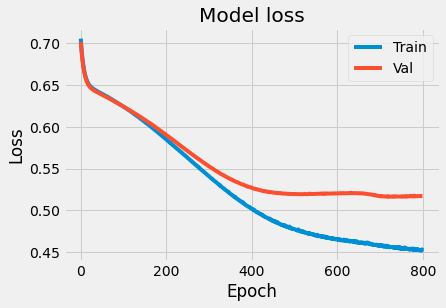

In [ ]:
#Visualise the training and validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()

The lines seem converged, however, they are not overfitting.

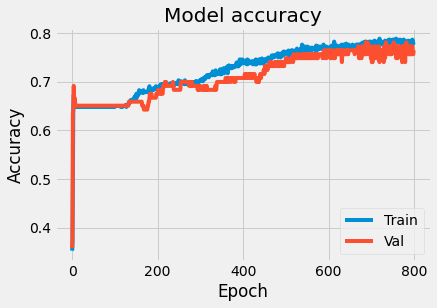

In [ ]:
#visualise the training accuracy and the validation accuracy to see if the model is overfitting 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'lower right')
plt.show()

This is slightly overfitting but works well. 

In [ ]:
#Predictions 
prediction = model.predict(X_test)
prediction = [1 if y>= 0.5 else 0 for y in prediction]
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


The values above indicate whether the prediction is equal to the test dataset. Setting the threshold as >= 0.5, it returns 1 if the probability >= 0.5, implying the chances of the person having diabetes, otherwise, it returns 0. 

In [ ]:
#Calculating the accuracy of the training set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred = [1 if y>= 0.5 else 0 for y in pred]
print(classification_report(y_train, pred))
print('Confusion Matrix:  \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))
print()

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       398
         1.0       0.73      0.58      0.65       216

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614

Confusion Matrix:  
 [[352  46]
 [ 90 126]]

Accuracy:  0.7785016286644951



The training accuracy is 0.77

In [ ]:
#Calculating the accuracy of the test set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred = [1 if y>= 0.5 else 0 for y in pred]
print(classification_report(y_test, pred))
print('Confusion Matrix:  \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))
print()

              precision    recall  f1-score   support

         0.0       0.83      0.84      0.83       102
         1.0       0.68      0.65      0.67        52

    accuracy                           0.78       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:  
 [[86 16]
 [18 34]]

Accuracy:  0.7792207792207793



In [ ]:
model.evaluate(X_test, y_test)[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.4599 - accuracy: 0.7792


0.7792207598686218

Therefore, we can see that based on the number of neurons present in a particular layer, the accuracy differs. We can further alter the number of Dense layers as well to reach a certain test and train accuracy score. The accuracy suggests how well the model is at predicting whether a person has diabetes or not. This resolves the business problem of classification issues of diabetes. 